In [5]:
#importing the libraries and reading the data
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random


In [6]:
#reading the data
df = pd.read_csv('spotify_Song_Dataset/dataset.csv')

#removing the row with null values
df = df.dropna()

#dropping duration and explicit columns 
df = df.drop(['duration_ms','explicit','mode','liveness','loudness','time_signature','key'],axis=1)

df.rename(columns={'Unnamed: 0': 'song_id'}, inplace=True)


df.head(5)


,song_id,track_id,artists,album_name,track_name,popularity,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,0.1430,0.0322,0.000001,0.715,87.917,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,0.0763,0.9240,0.000006,0.267,77.489,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0.0557,0.2100,0.000000,0.120,76.332,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0.0363,0.9050,0.000071,0.143,181.740,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,0.0526,0.4690,0.000000,0.167,119.949,acoustic


In [7]:
# Scaling the audio features and popularity
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])

# Add the original columns back to the DataFrame
df_scaled['song_id'] = df['song_id']
df_scaled['track_id'] = df['track_id']
df_scaled['artist_name'] = df['artists']
df_scaled['track_name'] = df['track_name']
df_scaled['album_name'] = df['album_name']
df_scaled['track_genre'] = df['track_genre']

# Encoding the track_genre
label_encoder = LabelEncoder()
df_scaled['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

# Handling outliers
z_scores = stats.zscore(df_scaled[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
outliers = (z_scores > 3) | (z_scores < -3)
df_scaled = df_scaled[(~outliers).all(axis=1)]

# Handling missing data
df_scaled = df_scaled.dropna() 

# Re-scaling the audio features and popularity after handling outliers
scaled_features = scaler.fit_transform(df_scaled[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
df_scaled[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']] = scaled_features

#dropping missing values
df_scaled = df_scaled.dropna()

# Display the final processed DataFrame
df_scaled.head(5)


,popularity,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,song_id,track_id,artist_name,track_name,album_name,track_genre,track_genre_encoded
0,1.771385,0.631139,-0.718850,1.042944,-0.841377,-0.507338,0.926583,-1.171923,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic,0
1,0.968000,-0.850328,-1.892423,0.032159,1.852071,-0.507323,-0.801100,-1.526016,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,Ghost (Acoustic),acoustic,0
2,1.057265,-0.746162,-1.124628,-0.280018,-0.304379,-0.507341,-1.367996,-1.565303,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,0
3,1.682120,-1.741522,-2.315705,-0.574009,1.794686,-0.507113,-1.279298,2.013922,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,acoustic,0
4,2.173077,0.295494,-0.790458,-0.326996,0.477862,-0.507341,-1.186744,-0.084248,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic,0


In [8]:
print(df_scaled.info())

#duplicate values
duplicate = df_scaled.duplicated()

print(duplicate.sum())

#dropping duplicate values
df_scaled = df_scaled.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
Index: 111719 entries, 0 to 113998
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   popularity           111719 non-null  float64
 1   danceability         111719 non-null  float64
 2   energy               111719 non-null  float64
 3   speechiness          111719 non-null  float64
 4   acousticness         111719 non-null  float64
 5   instrumentalness     111719 non-null  float64
 6   valence              111719 non-null  float64
 7   tempo                111719 non-null  float64
 8   song_id              111719 non-null  float64
 9   track_id             111719 non-null  object 
 10  artist_name          111719 non-null  object 
 11  track_name           111719 non-null  object 
 12  album_name           111719 non-null  object 
 13  track_genre          111719 non-null  object 
 14  track_genre_encoded  111719 non-null  int64  
dtypes: float64(9), int64(1

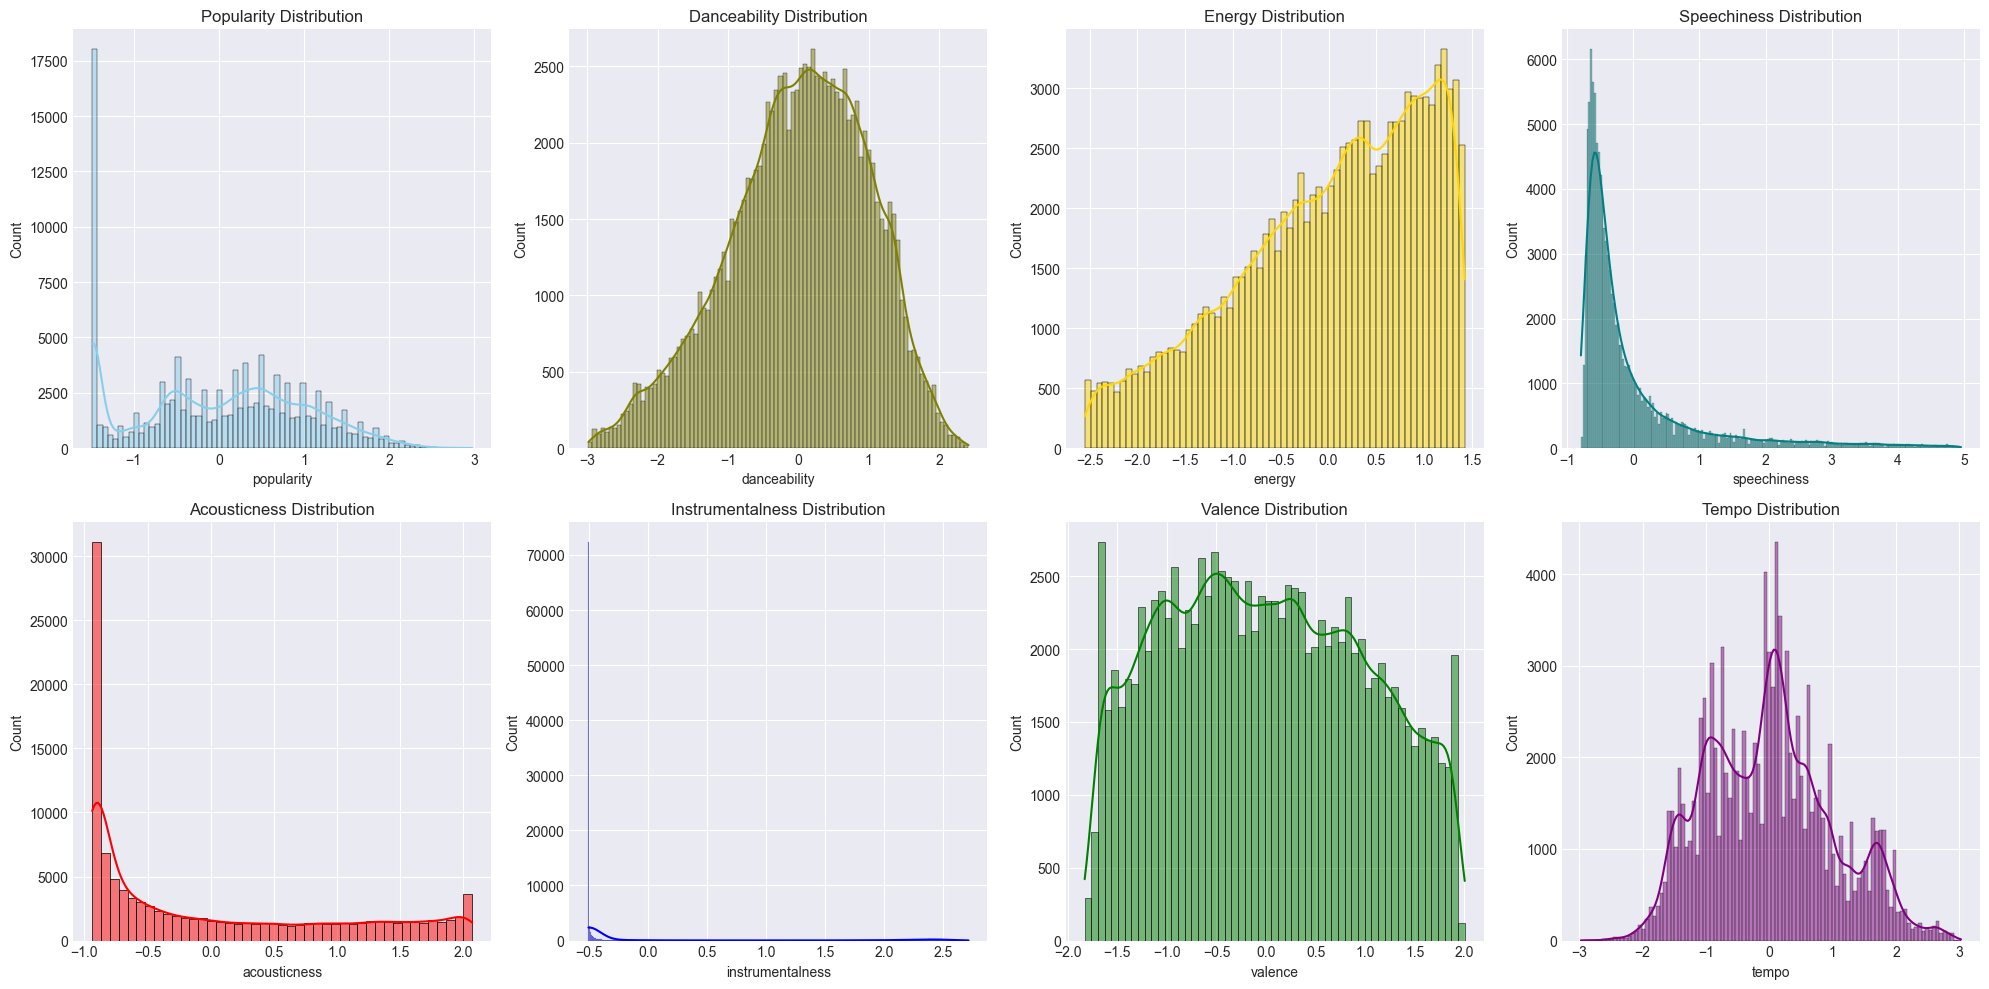

Popularity Range: -1.4867868881780375 - 2.976461810158765
Danceability Range: -2.9839865650716213 - 2.4193148335031305
Energy Range: -2.5527259665183046 - 1.4254067887779802
Speechiness Range: -0.789198897525081 - 4.95272827403704
Acousticness Range: -0.9386290433875079 - 2.069527629512441
Instrumentalness Range: -0.507340975391395 - 2.7118727670933334
Valence Range: -1.8307681982114639 - 2.0063847412786466
Tempo Range: -2.9748467359893196 - 3.0267255824392745


In [9]:
#styling the plot
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot the distribution of popularity
sns.histplot(df_scaled['popularity'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Popularity Distribution')

# Plot the distribution of danceability
sns.histplot(df_scaled['danceability'], kde=True, color='olive', ax=axes[0, 1])
axes[0, 1].set_title('Danceability Distribution')

# Plot the distribution of energy
sns.histplot(df_scaled['energy'], kde=True, color='gold', ax=axes[0, 2])
axes[0, 2].set_title('Energy Distribution')

# Plot the distribution of speechiness
sns.histplot(df_scaled['speechiness'], kde=True, color='teal', ax=axes[0, 3])
axes[0, 3].set_title('Speechiness Distribution')

# Plot the distribution of acousticness
sns.histplot(df_scaled['acousticness'], kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Acousticness Distribution')

# Plot the distribution of instrumentalness
sns.histplot(df_scaled['instrumentalness'], kde=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Instrumentalness Distribution')

# Plot the distribution of valence
sns.histplot(df_scaled['valence'], kde=True, color='green', ax=axes[1, 2])
axes[1, 2].set_title('Valence Distribution')

# Plot the distribution of tempo
sns.histplot(df_scaled['tempo'], kde=True, color='purple', ax=axes[1, 3])
axes[1, 3].set_title('Tempo Distribution')

# Display the plots
plt.tight_layout()
plt.show()

#printing the range of each audio feature
print('Popularity Range:', df_scaled['popularity'].min(), '-', df_scaled['popularity'].max())
print('Danceability Range:', df_scaled['danceability'].min(), '-', df_scaled['danceability'].max())
print('Energy Range:', df_scaled['energy'].min(), '-', df_scaled['energy'].max())
print('Speechiness Range:', df_scaled['speechiness'].min(), '-', df_scaled['speechiness'].max())
print('Acousticness Range:', df_scaled['acousticness'].min(), '-', df_scaled['acousticness'].max())
print('Instrumentalness Range:', df_scaled['instrumentalness'].min(), '-', df_scaled['instrumentalness'].max())
print('Valence Range:', df_scaled['valence'].min(), '-', df_scaled['valence'].max())
print('Tempo Range:', df_scaled['tempo'].min(), '-', df_scaled['tempo'].max())


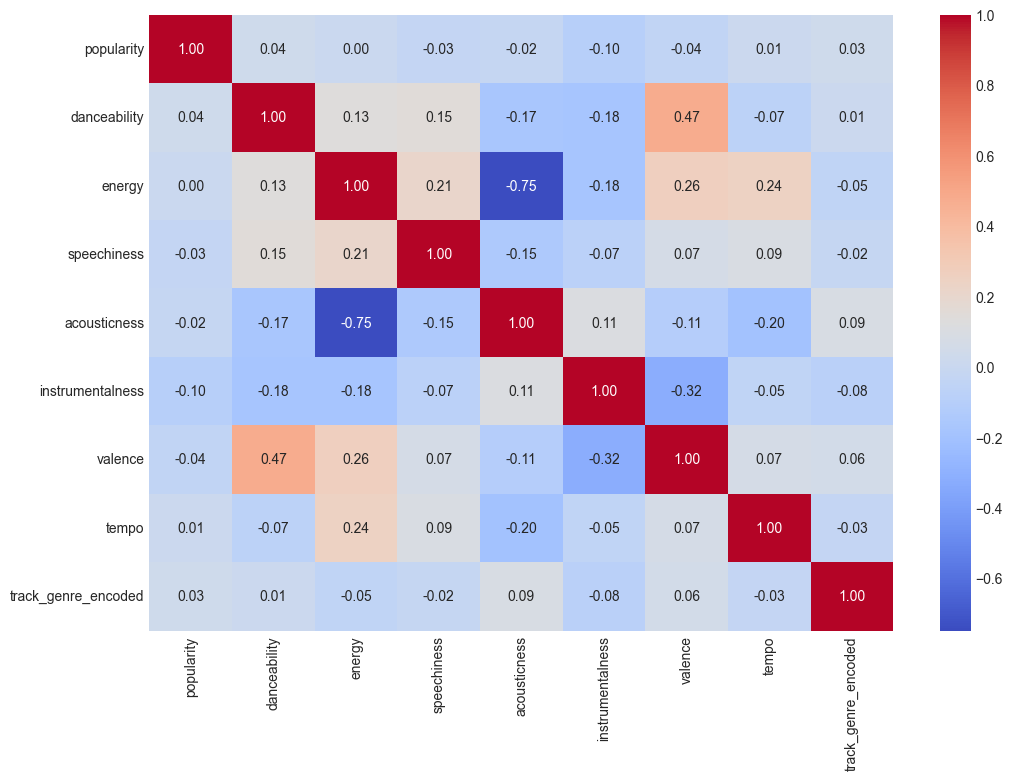

In [10]:
#geerating correlation matrix
correlation_matrix = df_scaled[['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'track_genre_encoded']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

In [11]:

# Defining the features
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'track_genre_encoded']

def recommend_songs(user_songs, df, features, top_n=5):
    """
    Recommend songs based on a list of user input songs.
    
    Parameters:
    - user_songs: List of song_ids representing user's current playlist or preferences.
    - df: The DataFrame containing the song dataset.
    - features: List of features to be used for similarity calculation.
    - top_n: Number of recommendations to return.
    
    Returns:
    - DataFrame with recommended song details sorted by popularity.
    """
    
    # Filter the dataset to get the user's songs
    user_songs_df = df[df['song_id'].isin(user_songs)]
    
    # Compute cosine similarity between all user songs and all songs in the dataset
    similarity_matrix = cosine_similarity(user_songs_df[features], df[features])
    
    # Aggregate the similarity scores across all user songs
    aggregated_similarities = similarity_matrix.mean(axis=0)
    
    # Add the similarity scores to the dataframe
    df['similarity'] = aggregated_similarities
    
    # Exclude the user's input songs from the recommendations
    recommendations = df[~df['song_id'].isin(user_songs)]
    
    # Sort by similarity score (and by popularity as a secondary sort if available)
    recommendations = recommendations.sort_values(by=['similarity', 'popularity'], ascending=[False, False])
    
    # Get the top N recommendations
    recommended_songs_df = recommendations.head(top_n)
    
    return recommended_songs_df

# Example usage:
user_songs = [1000, 1220, 2450, 2650, 6080, 9200, 4500, 230]  # Replace with actual song_ids from the dataset
recommended_songs = recommend_songs(user_songs, df_scaled, features, top_n=5)

# Print the recommended songs
print("Recommended Songs: ")
for index, row in recommended_songs.iterrows():
    print(f"Song ID: {row['song_id']}, Similarity: {row['similarity']:0.4f}")
    print(f"Song Details: {row['track_name']} by {row['artist_name']}")
    print("\n")


Recommended Songs: 
Song ID: 7121.0, Similarity: 0.6188
Song Details: Tear It Down by Old Crow Medicine Show


Song ID: 7169.0, Similarity: 0.6165
Song Details: Hard To Love by Old Crow Medicine Show


Song ID: 7445.0, Similarity: 0.6161
Song Details: You Don’t Have To Move That Mountain - Live From The Freight And Salvage/2000 by Nickel Creek


Song ID: 8199.0, Similarity: 0.6159
Song Details: You Never Can Tell - 1986 Stereo Remix by Chuck Berry


Song ID: 8225.0, Similarity: 0.6151
Song Details: Run Rudolph Run by Chuck Berry




# VADER SENTIMENT ANALYSIS

In [12]:
def analyze_user_emotion(user_text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(user_text)
    
    # Determine the emotion based on the sentiment scores
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

### Environment for the reinforcement learning model

In [14]:
def recommend_songs_based_on_emotion(user_songs, df, features, user_emotion, top_n=20):
    """
    Recommend songs considering user's emotional state.
    """
    
    # Get the cosine similarity-based recommendations
    recommended_songs = recommend_songs(user_songs, df, features, top_n)
    
    # Incorporate the user's emotion into the recommendation strategy
    # For simplicity, assume we have predefined weights for each emotion
    emotion_weights = {
        'positive': 1.0,
        'neutral': 0.5,
        'negative': -1.0
    }
    
    # Adjust the similarity score based on emotion
    recommended_songs['adjusted_similarity'] = recommended_songs['similarity'] * emotion_weights[user_emotion]
    
    # Sort again based on the adjusted similarity
    recommended_songs = recommended_songs.sort_values(by='adjusted_similarity', ascending=False)
    
    return recommended_songs.head(top_n)


Not bad I am feeling good but a little worried about some stuff but I guess it will get better soon

In [16]:
import numpy as np
import random
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

class RecommendationAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.q_table = np.zeros((state_size, action_size))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore: random song
        return np.argmax(self.q_table[state])  # Exploit: best known song

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return  # Do nothing if not enough samples in memory
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.max(self.q_table[next_state])
            self.q_table[state, action] += self.learning_rate * (target - self.q_table[state, action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Example usage
state_size = 3  # Three possible emotions: positive, neutral, negative
action_size = len(df_scaled)  # Number of songs in the dataset

# Initialize the RL agent
agent = RecommendationAgent(state_size, action_size)

# Initialize the user_songs playlist with some initial songs
user_songs = [910433, 67016, 91000, 81004, 17000, 20414, 81000, 81074, 81109, 20652, 91016, 91017, 91018, 51150, 51503, 56064, 33012, 57162, 53050, 67351, 51450, 94632, 51500, 53055]

# Interactive loop for user interaction
for e in range(10):  # Number of interactions (can be adjusted)
    # Get user input for emotion analysis
    user_text = input("How are you feeling today? ")
    user_emotion = analyze_user_emotion(user_text)
    state = ['positive', 'neutral', 'negative'].index(user_emotion)
    
    # RL agent decides which song to recommend based on the current state (emotion)
    action = agent.act(state)
    
    # Get the top N recommendations based on the selected song and user emotion
    recommended_songs = recommend_songs_based_on_emotion(user_songs=user_songs, df=df_scaled, features=features, user_emotion=user_emotion, top_n=20)
    
    # Occasionally recommend a random song from the dataset to introduce new interests
    if np.random.rand() < 0.1:  # 10% chance to recommend a random song
        random_action = random.randrange(action_size)
        print(f"Exploration Recommendation (Random Song): {df_scaled.iloc[random_action]['track_name']} by {df_scaled.iloc[random_action]['artist_name']}")
    
    # Show the recommendations to the user and get feedback for each song
    print("Top 20 Recommendations based on your current mood:")
    for index, row in recommended_songs.iterrows():
        print(f"{row['track_name']} by {row['artist_name']} (Similarity: {row['adjusted_similarity']:0.4f})")
        feedback = input("Did you like this recommendation? (yes/no): ")
        reward = 1 if feedback.lower() == "yes" else -1
        
        # If the song is liked, ask if the user wants to add it to their playlist
        if reward == 1:
            add_to_playlist = input("Would you like to add this song to your playlist? (yes/no): ")
            if add_to_playlist.lower() == "yes":
                user_songs.append(row.name)
        
        # Simulate the next state: how the user's emotion changes after interacting with the recommendation
        next_state = np.random.randint(0, state_size)
        done = False  # The episode continues indefinitely
        
        # Store the experience in the agent's memory
        agent.remember(state, row.name, reward, next_state, done)
    
    # Train the agent with replay (experience replay)
    agent.replay(batch_size=32)
    
    #print the user songs
    print("\nYour Playlist:", user_songs)
    print("Your Playlist:")
    for song_id in user_songs:
        song_details = df_scaled[df_scaled['song_id'] == song_id].iloc[0]
        print(f"{song_details['track_name']} by {song_details['artist_name']}")

    print("\n--- End of Interaction ---\n")


Top 20 Recommendations based on your current mood:
Pop Virus by Gen Hoshino (Similarity: 0.9737)
Look For The Good (Single Version) by Jason Mraz (Similarity: 0.9550)
Days I Will Remember by Tyrone Wells (Similarity: 0.9110)
Tell Somebody Bout Jesus by Jaron Nurse (Similarity: 0.8557)
So Good by Greyboy;Bing Ji Ling (Similarity: 0.8467)
Mariô by Criolo (Similarity: 0.8466)
Blister In The Sun by Violent Femmes (Similarity: 0.8404)
Losin' Ground by Cymande (Similarity: 0.8392)
Authentic by A Mose;TBabz (Similarity: 0.8140)
Original Joy by TBabz;Naffymar (Similarity: 0.7980)
Asas by OQuadro;Jorge Du Peixe (Similarity: 0.7979)
Confirm by A Mose;Nolly (Similarity: 0.7942)
Hard Talk, Pt. 2 by TJ Cream;Marko (Similarity: 0.7941)
接吻 by Hanare Gumi (Similarity: 0.7909)
Wisdom Seeker by TJ Cream;Beloved Music (Similarity: 0.7873)
Rita by La Cumbia Chicharra (Similarity: 0.7706)
Corazones Rojos by Los Prisioneros (Similarity: 0.7706)
Corazones Rojos by Los Prisioneros (Similarity: 0.7706)
Like a 

KeyboardInterrupt: Interrupted by user